<a href="https://colab.research.google.com/github/Rutuja-Shukla/Waste-Classification/blob/main/Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow.keras.optimizers as RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

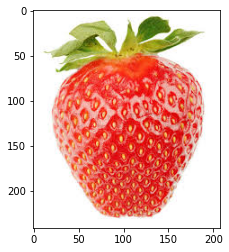

In [ ]:
img = image.load_img('/content/drive/My Drive/PROJECTS/Waste_Segregator_with_Image_Processing/Dataset/TRAIN/O_1.jpg')
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/My Drive/PROJECTS/Waste_Segregator_with_Image_Processing/Dataset/TRAIN/O_1.jpg').shape

(242, 208, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = train = ImageDataGenerator(rescale=1/255)

In [ ]:
#Training Set
train_dataset = train.flow_from_directory('/content/drive/My Drive/PROJECTS/Waste_Segregator_with_Image_Processing/DATASET/TRAIN',
                                             target_size=(200,200),
                                             batch_size=3,
                                             class_mode='binary'
                                             )
#Validation Set
validation_dataset = validation.flow_from_directory('/content/drive/My Drive/PROJECTS/Waste_Segregator_with_Image_Processing/DATASET/TEST',
                                           target_size=(200,200),
                                           batch_size = 3,
                                           class_mode='binary'
                                           )

Found 22692 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'O': 0, 'R': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_dataset.class_indices

{'O': 0, 'R': 1}

In [ ]:
validation_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
#Create a Neural Network Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),
                                                           activation='relu',
                                                           input_shape = (200,200,3)
                                                          ),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),
                                                           activation='relu'),
                                    
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),
                                                           activation='relu'),
                                    
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,
                                                          activation='relu'),
                                                                       
                                    tf.keras.layers.Dense(1,
                                                          activation='sigmoid')

])

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'] )

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 10,
                      validation_data = validation_dataset)

Epoch 1/10
5/5 [==============================] - 46s 9s/step - loss: 4.2350 - accuracy: 0.5333 - val_loss: 1.5113 - val_accuracy: 0.5575
Epoch 2/10
5/5 [==============================] - 45s 9s/step - loss: 1.2427 - accuracy: 0.4000 - val_loss: 0.6618 - val_accuracy: 0.5575
Epoch 3/10
5/5 [==============================] - 47s 9s/step - loss: 0.7090 - accuracy: 0.5333 - val_loss: 0.6105 - val_accuracy: 0.6267
Epoch 4/10
5/5 [==============================] - 45s 9s/step - loss: 0.6939 - accuracy: 0.5333 - val_loss: 0.6027 - val_accuracy: 0.7191
Epoch 5/10
5/5 [==============================] - 46s 9s/step - loss: 0.6699 - accuracy: 0.5333 - val_loss: 0.6096 - val_accuracy: 0.5667
Epoch 6/10
5/5 [==============================] - 46s 9s/step - loss: 0.7831 - accuracy: 0.5333 - val_loss: 0.6259 - val_accuracy: 0.8448
Epoch 7/10
5/5 [==============================] - 46s 9s/step - loss: 1.0407 - accuracy: 0.4667 - val_loss: 0.6591 - val_accuracy: 0.8118
Epoch 8/10
5/5 [==================

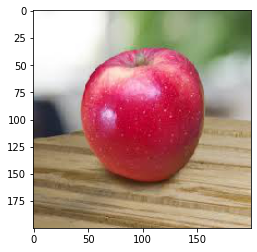

Organic


In [ ]:
img = image.load_img('/content/drive/My Drive/PROJECTS/Waste_Segregator_with_Image_Processing/download.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])
val = model.predict(images)
if val == 0:
  print("Organic")
else:
  print("Recyclic")
